# K-means and KNN

Implementing K-kmeans and KNN from scratch using numpy, tested on iris

## Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
iris['data'][:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
X = iris['data']
y = iris['target']
y_labels = iris['target_names']
x_labels = iris['feature_names']

In [12]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [13]:
x_labels

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
y_labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
X.shape

(150, 4)

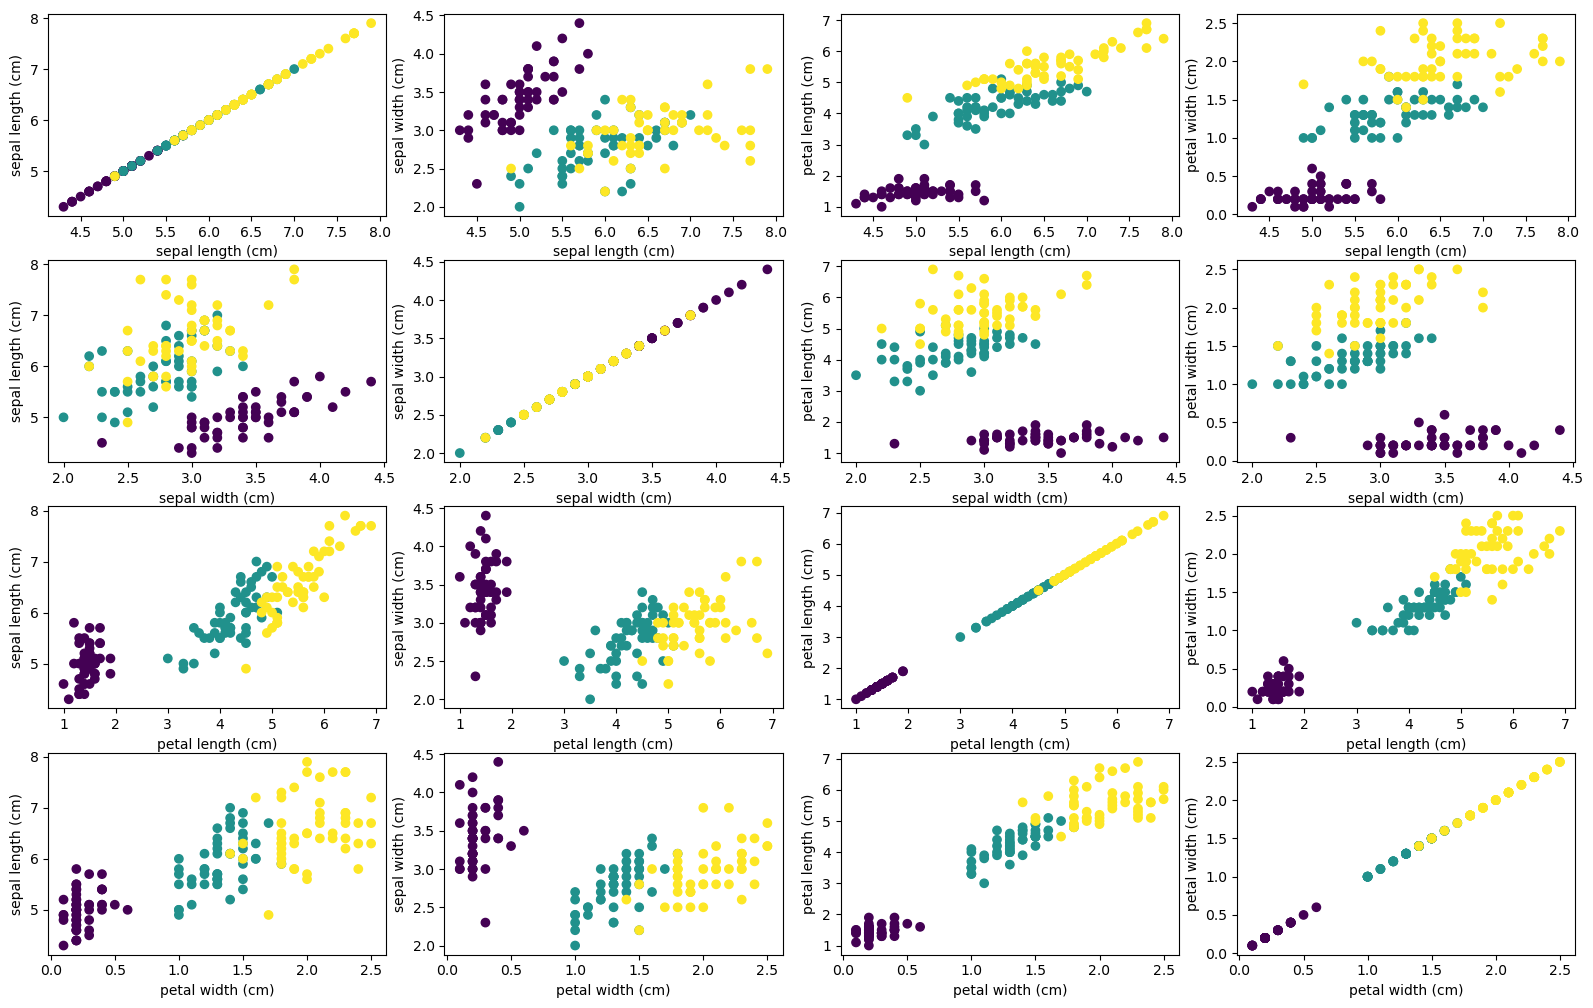

In [22]:
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(16, 10)
fig.tight_layout()
for i in range(4):
    for j in range(4):
        axs[i, j].scatter(X[:,i], X[:,j], c=y)
        axs[i, j].set(xlabel=x_labels[i], ylabel=x_labels[j])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Dimensionality Reduction

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [25]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.enc1 = nn.Linear(in_features=4, out_features=6)
        self.enc2 = nn.Linear(in_features=6, out_features=2)

        # Decoder layers
        self.dec1 = nn.Linear(in_features=2, out_features=6)
        self.dec2 = nn.Linear(in_features=6, out_features=4)

    def forward(self, x):
        # Encoder
        x = self.enc1(x)
        x = torch.relu(x)
        x = self.enc2(x)
        x = torch.relu(x)

        # Decoder
        x = self.dec1(x)
        x = torch.relu(x)
        x = self.dec2(x)
        x = torch.sigmoid(x)

        return x

In [33]:
model = Autoencoder()

In [34]:
dataloader = DataLoader(torch.Tensor(X), batch_size=64, shuffle=True)

In [35]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    running_loss = 0.0
    for data in dataloader:
        inputs = data
        # print(inputs)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch + 1} loss: {running_loss}")

Epoch 1 loss: 38.93270969390869
Epoch 101 loss: 28.938485145568848
Epoch 201 loss: 29.441728591918945
Epoch 301 loss: 29.80335235595703
Epoch 401 loss: 30.138827323913574
Epoch 501 loss: 29.947511672973633
Epoch 601 loss: 29.871707916259766
Epoch 701 loss: 29.92316246032715
Epoch 801 loss: 30.478883743286133
Epoch 901 loss: 28.900074005126953


In [36]:
encoder = nn.Sequential(
    model.enc1,
    nn.ReLU(),
    model.enc2,
    nn.ReLU()
).eval()

# Encode your data into 2 dimensions
with torch.no_grad():
    encoded_data = encoder(torch.tensor(X).to(encoder[0].weight.dtype))

In [37]:
encoded_data = encoded_data.detach().numpy()

In [38]:
encoded_data.shape

(150, 2)

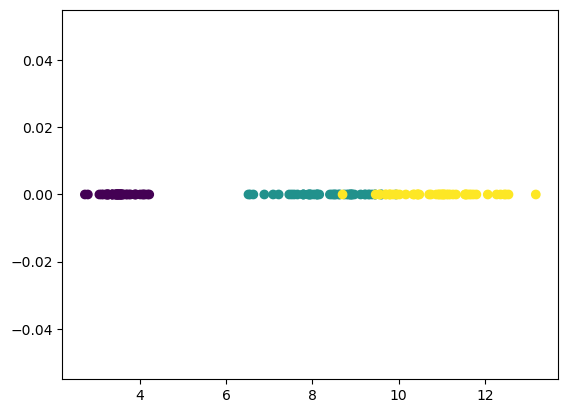

In [39]:
plt.scatter(encoded_data[:,0], encoded_data[:,1], c=y)

### UMAP

In [40]:
import umap
from sklearn.preprocessing import StandardScaler

/Users/maxperozek/opt/anaconda3/envs/py4sci/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-07 10:10:51.482868: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
reducer = umap.UMAP()

In [42]:
scaled_iris = StandardScaler().fit_transform(X)

In [43]:
iris_embedding = reducer.fit_transform(scaled_iris)

In [44]:
iris_embedding.shape

(150, 2)

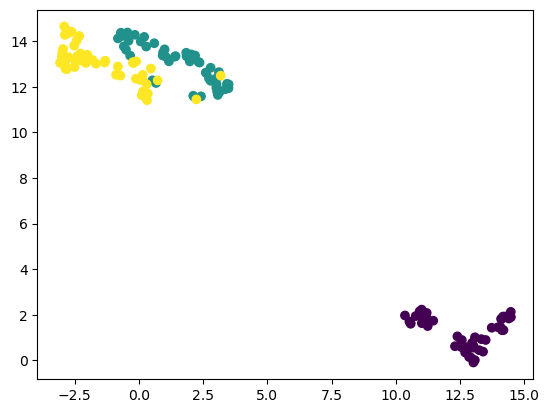

In [45]:
plt.scatter(iris_embedding[:,0], iris_embedding[:,1], c=y)


Write a method, iris_distance, that takes in two elements of the Iris dataset and computes the distance between them. How you compute the distance is up to you - the simplest way is to just treat each Iris example as a vector and compute the Euclidean distance between those vectors.

In [46]:
def iris_distance(x1, x2):
    return np.sqrt(((x2 - x1) ** 2).sum())

# K-means


Finish implementing the K-means algorithm.

In [47]:
from scipy.spatial.distance import cdist

In [55]:
class KMeansClusterer():
    
    def __init__(self, K):
        self.K = K
    
    def cluster(self, X):
        # init clusters randomly
        centers = np.random.random((self.K, X.shape[1]))
        centers = np.abs(centers) * 6 # manually scaling clusters to more appropriately fit the data
        
        prev = None
        changed = True
        epoch = 0
        while changed:
            
            distances = cdist(X, centers)
            assignments = np.argmin(distances, axis=1)

            for i in range(self.K):
                a_points = X[assignments == i, :]
                centers[i] = np.mean(a_points, axis=0)

            if (prev is not None) and ((assignments == prev).all()):
                print('converged')
                changed = False
            
            prev = assignments
            epoch += 1
            
            if epoch > 2000: break
        
        return assignments
            


Run your K-means algorithm 10 times on your training dataset from 0a, and visualize the results somehow (for example, you could plot two of the features as x,y points in a scatter plot). Does your Kmeans code produce consistent results? Why do you think this is or isn't the case?

In [56]:
model = KMeansClusterer(3)

In [57]:
assignments = model.cluster(X_train)

In [58]:
clusters = []

for i in range(10):
    clusters.append(model.cluster(X_train))

converged
converged


In [65]:
clusters[6:]

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1,
        2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 

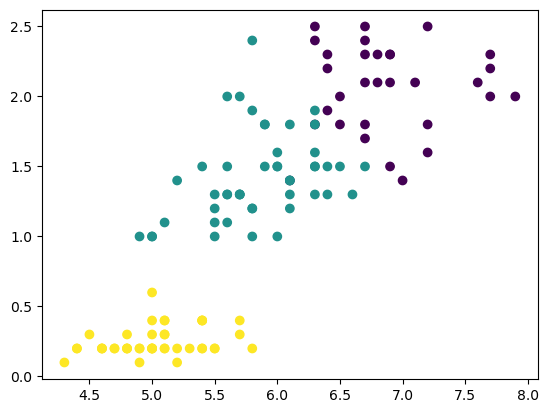

In [60]:
plt.scatter(X_train[:,0], X_train[:,3], c=clusters[0])

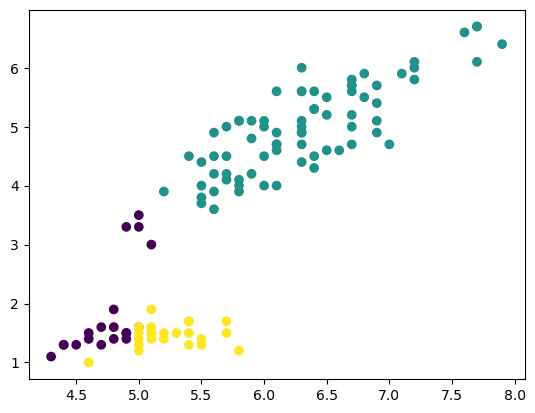

In [70]:
plt.scatter(X_train[:,0], X_train[:,2], c=clusters[8])

Most of the time, pretty terrible results are produced, where the algorithm assigns every point to the same cluster, usually resulting in all assignments flipping between clusters and never converging. This seems to be the result of poor choice of starting points. I was able to make it converge more frequently (but still poor average case performance) by scaling the random initialized values manually to fall into the range of the data.

# KNN Classifier

Finish implementing the K-nearest-neighbors classification algorithm.

In [71]:
from scipy.stats import mode

In [73]:
class KNNClassifier():
    
    def __init__(self, K):
        self.K = K
    
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
    
    def transform(self, X_new):
        new_labels = []
        
        for vec in X_new:
            dists_and_labels = []
            
            for i in range(self.X.shape[0]):
                data_vec = self.X[i]
                label = self.Y[i]
                
                dist = iris_distance(vec, data_vec)
                dists_and_labels.append( (dist, label) )
            
            sorted_pairs = sorted(dists_and_labels, key = lambda x: x[0] )
            k_best_pairs = sorted_pairs[:self.K]
            k_best_labels = [item[1] for item in k_best_pairs]
            
            label = mode(np.array(k_best_labels),keepdims=False)[0]
            new_labels.append(label)
            
        return new_labels

Using your test iris dataset from 0a, test your K-nearest neighbors algorithm for different values of K. What value of K produces the highest accuracy on the test dataset?

In [83]:
accs = []

for k in range(1,100,1):
    knn_model = KNNClassifier(k)
    knn_model.fit(X_train, y_train)
    acc = (knn_model.transform(X_test) == y_test).sum()/X_test.shape[0]
    accs.append(acc)

Text(0, 0.5, 'accuracy')

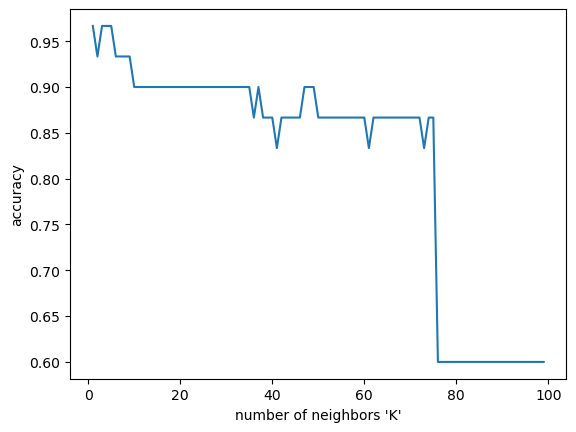

In [84]:
plt.plot(range(1,100,1), accs)
plt.xlabel("number of neighbors 'K'")
plt.ylabel("accuracy")

In [87]:
np.argmax(np.array(accs))

0

In [88]:
accs[:15]

[0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9]

1, 3, 4, 5 neighbors result in the best acc

All values for k below 10 produce good (>90%) performance on the test set. There is a large drop-off in performance around K=75. This makes sense, since there are 50 examples per class, so it makes sense that it would take a bit more than that to throw off the vote, since nearest-neighbors will be majority the same class in the average case.